In [1]:
!tree

.
├── check_trainVStest.ipynb
├── test_Изъяты лексемы с частотой выше 100 - Modelo 0.csv
├── test_Изъяты лексемы с частотой выше 100 - Modelo 1.csv
├── test_Изъяты лексемы с частотой выше 100 - Modelo 2.csv
├── test_Изъяты лексемы с частотой выше 100 - Modelo 3.csv
├── test_Изъяты лексемы с частотой выше 100 - rubert-base-cased.csv
├── test_Изъяты лексемы с частотой выше 100.csv
├── test_Изъяты лексемы с частотой выше 29 - Modelo 0.csv
├── test_Изъяты лексемы с частотой выше 29 - Modelo 1.csv
├── test_Изъяты лексемы с частотой выше 29 - Modelo 2.csv
├── test_Изъяты лексемы с частотой выше 29 - Modelo 3.csv
├── test_Изъяты лексемы с частотой выше 29 - rubert-base-cased.csv
├── test_Изъяты лексемы с частотой выше 29.csv
├── test_Изъяты лексемы с частотой выше 3 - Modelo 0.csv
├── test_Изъяты лексемы с частотой выше 3 - Modelo 1.csv
├── test_Изъяты лексемы с частотой выше 3 - Modelo 2.csv
├── test_Изъяты лексемы с частотой выше 3 - Modelo 3.csv
├── test_Изъяты лексемы с частотой выше 3 - 

In [2]:
import pandas as pd
from nltk import ngrams
from collections import Counter

train_file = "train_Изъяты лексемы с частотой выше 3.csv"
test_file = "test_Изъяты лексемы с частотой выше 3.csv"

train_df = pd.read_csv(train_file, encoding='utf-8')
test_df = pd.read_csv(test_file, encoding='utf-8')

train_texts = train_df['text'].tolist()
test_texts = test_df['text'].tolist()


def generate_ngrams(text, n=2):
    # Dividir el texto en palabras
    words = text.split()
    # Generar N-gramas
    return list(ngrams(words, n))

# Definir el tamaño de los N-gramas (puedes cambiarlo: 2 para bigramas, 3 para trigramas, etc.)
n = 4
train_ngrams = []
for text in train_texts:
    train_ngrams.extend(generate_ngrams(text, n))

test_ngrams = []
for text in test_texts:
    test_ngrams.extend(generate_ngrams(text, n))
  
train_ngram_set = set(train_ngrams)
test_ngram_set = set(test_ngrams)


intersecciones = train_ngram_set.intersection(test_ngram_set)

# Mostrar resultados
if intersecciones:
    print(f"Se encontraron intersecciones de {n}-gramas entre 'train' y 'test':")
    for ngram in intersecciones:
        # Convertir el N-grama a una cadena legible
        ngram_text = " ".join(ngram)
        print(f"- {ngram_text}")
    print(f"Total de intersecciones: {len(intersecciones)}")
else:
    print(f"No se encontraron intersecciones de {n}-gramas entre 'train' y 'test'.")


Se encontraron intersecciones de 4-gramas entre 'train' y 'test':
- некодирующих последовательностей нуклеотидов известен
- изменению термодинамического потенциала Гиббса
- Шесть внешних губных сенсилл
- комбинации социально- психологических характеристик
- сплошных сред пондеромоторные силы
- оценка достигнутого своими силами
- физике сплошных сред пондеромоторные
- антропоцентрической лингвистикиназывают дискурсивным переворотом
- равная изменению термодинамического потенциала
- неповторимость комбинации социально- психологических
- психологической концепцией школы Л.
- создание автором сложных модусных
- исходная точка всякой гуманитарной
- половозрелых червей 3.2- 8.5
- находят свое косвенное феноменальное
- экстренному решению новых задач
- концепцией школы Л. С.
Total de intersecciones: 17


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vectorizer = CountVectorizer(tokenizer=lambda x: x.split())  # Tokeniza por espacios
all_texts = train_texts + test_texts  # Combinar ambos para ajustar el vectorizador
vectorizer.fit(all_texts)

# Convertir los textos en matrices de conteo de tokens
train_vectors = vectorizer.transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

# Calcular la similitud de coseno entre todas las combinaciones de frases
similarity_matrix = cosine_similarity(train_vectors, test_vectors)

# Umbral de similitud (ajústalo según qué tan "muy similares" quieras que sean)
threshold = 0.3  # Por ejemplo, 90% de similitud

# Encontrar frases muy similares
similar_pairs = []
for i in range(len(train_texts)):
    for j in range(len(test_texts)):
        similarity = similarity_matrix[i][j]
        if similarity >= threshold:
            similar_pairs.append((train_texts[i], test_texts[j], similarity))

# Mostrar resultados
if similar_pairs:
    print("Se encontraron frases muy similares entre 'train' y 'test':")
    for train_text, test_text, sim in similar_pairs:
        print(f"\nTrain: {train_text}")
        print(f"Test:  {test_text}")
        print(f"Similitud: {sim:.4f}")
    print(f"Total de pares similares: {len(similar_pairs)}")
else:
    print(f"No se encontraron frases muy similares (umbral: {threshold}).")

Se encontraron frases muy similares entre 'train' y 'test':

Train: Коргина Описание Имаго среднего размера муравьиные львы прозрачными крыльями 24-33 мода 27 23-29 обоих полов 18-25
Test:  Крупные и среднего размера черные или бурые муравьиные львы с прозрачными крыльями без рисунка (рис. ), 4 и 2).
Similitud: 0.3273

Train: Агрегаты состоят удлиненных пластинчатых объединенных параллельные расходящиеся пучки Размер индивидуальных микрокристаллов поперечнике 100-200 удлинению матовый шелковистого растворим воде флуоресцирует пикнометрически 2.01 формуле 2.001 Отдельные иммерсии бесцветные прозрачные несовершенная базальная отдельность плеохроизм серые интерференции угол погасания 45° 1.493 определен
Test:  Агрегаты состоят из очень мелких удлиненных пластинчатых кристаллов объединенных в параллельные или расходящиеся пучки (рис. 2).
Similitud: 0.3244

Train: В 3. Д 3. Е 4. А Лента л2 проходит близко л.
Test:  Г, 3.
Similitud: 0.3780

Train: Тело черное Радикула базальная основного 3-5

/workspace/notebooks/Carlos/fine_tunig_project/mi_entorno/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [4]:
import numpy as np
from transformers import AutoTokenizer
from collections import Counter
import matplotlib.pyplot as plt
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')


def get_token_lengths(texts, tokenizer):
    lengths = []
    for text in texts:
        tokens = tokenizer.encode(text, add_special_tokens=True)  # Incluye [CLS] y [SEP]
        lengths.append(len(tokens))
    return lengths 

train_lengths = get_token_lengths(train_texts, tokenizer)
test_lengths = get_token_lengths(test_texts, tokenizer)


              

/workspace/notebooks/Carlos/fine_tunig_project/mi_entorno/lib/python3.8/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Estadísticas para Train:
Promedio: 115.19
Mediana: 42.00
Mínimo: 6
Máximo: 1138
Percentil 90: 284.30
Percentil 95: 491.45
Percentil 99: 875.45

Estadísticas para Test:
Promedio: 23.82
Mediana: 20.00
Mínimo: 6
Máximo: 113
Percentil 90: 41.00
Percentil 95: 51.05
Percentil 99: 76.01

Muestreo de frecuencias para Train (10 más comunes):
Longitud 11: 5 textos
Longitud 19: 4 textos
Longitud 42: 3 textos
Longitud 73: 3 textos
Longitud 25: 3 textos
Longitud 18: 3 textos
Longitud 16: 3 textos
Longitud 33: 2 textos
Longitud 14: 2 textos
Longitud 34: 2 textos

Muestreo de frecuencias para Test (10 más comunes):
Longitud 9: 36 textos
Longitud 14: 29 textos
Longitud 7: 29 textos
Longitud 18: 28 textos
Longitud 21: 27 textos
Longitud 20: 26 textos
Longitud 17: 25 textos
Longitud 13: 25 textos
Longitud 16: 25 textos
Longitud 11: 23 textos


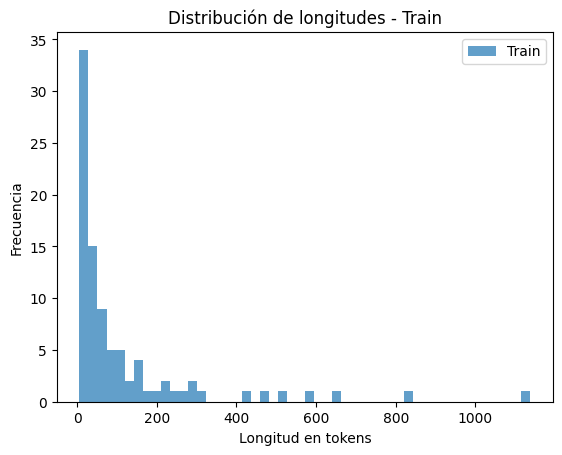

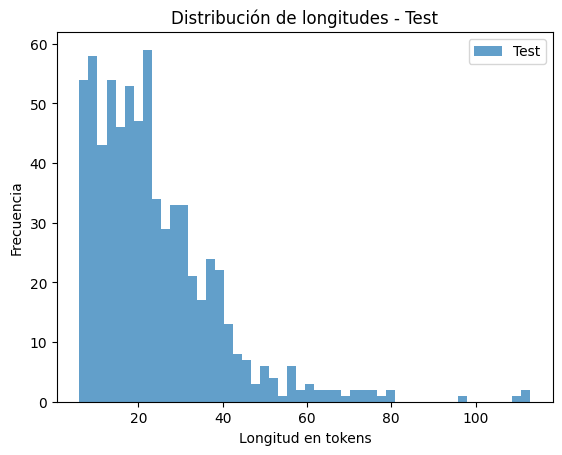


Sugerencia de max_length (basado en percentil 95): 491


In [5]:
def print_stats(lengths, name):
    print(f"\nEstadísticas para {name}:")
    print(f"Promedio: {np.mean(lengths):.2f}")
    print(f"Mediana: {np.median(lengths):.2f}")
    print(f"Mínimo: {np.min(lengths)}")
    print(f"Máximo: {np.max(lengths)}")
    print(f"Percentil 90: {np.percentile(lengths, 90):.2f}")
    print(f"Percentil 95: {np.percentile(lengths, 95):.2f}")
    print(f"Percentil 99: {np.percentile(lengths, 99):.2f}")

# Frecuencias de longitudes
def print_frequency_sample(lengths, name):
    counter = Counter(lengths)
    print(f"\nMuestreo de frecuencias para {name} (10 más comunes):")
    for length, freq in counter.most_common(10):
        print(f"Longitud {length}: {freq} textos")

# Visualización
def plot_lengths(lengths, name):
    plt.hist(lengths, bins=50, alpha=0.7, label=name)
    plt.xlabel('Longitud en tokens')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de longitudes - {name}')
    plt.legend()
    plt.show()

# Ejecutar análisis
print_stats(train_lengths, "Train")
print_stats(test_lengths, "Test")
print_frequency_sample(train_lengths, "Train")
print_frequency_sample(test_lengths, "Test")
plot_lengths(train_lengths, "Train")
plot_lengths(test_lengths, "Test")

# Sugerencia de max_length
max_length_suggestion = int(max(np.percentile(train_lengths, 95), np.percentile(test_lengths, 95)))
print(f"\nSugerencia de max_length (basado en percentil 95): {max_length_suggestion}")